In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\acre\OneDrive\Desktop\pandas\ml project 2\car details v4.csv')

In [3]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [4]:
# selecting relevant features
df =df[['Year', 'Kilometer', 'Make', 'Model', 'Fuel Type', 'Transmission', 'Owner', 'Engine', 'Price']]

## Data Understanding

In [5]:
df.head()

,Year,Kilometer,Make,Model,Fuel Type,Transmission,Owner,Engine,Price
0,2017,87150,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,First,1198 cc,505000
1,2014,75000,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Second,1248 cc,450000
2,2011,67000,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Manual,First,1197 cc,220000
3,2019,37500,Toyota,Glanza G,Petrol,Manual,First,1197 cc,799000
4,2018,69000,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Manual,First,2393 cc,1950000


In [6]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [7]:
df.shape

(2059, 9)

In [8]:
# check number of null values
df.isnull().sum()

Year             0
Kilometer        0
Make             0
Model            0
Fuel Type        0
Transmission     0
Owner            0
Engine          80
Price            0
dtype: int64

In [9]:
# check number of duplicate data
df.duplicated().sum()

np.int64(5)

In [10]:
df.dtypes

Year             int64
Kilometer        int64
Make            object
Model           object
Fuel Type       object
Transmission    object
Owner           object
Engine          object
Price            int64
dtype: object

## Data Preprocessing

In [11]:
# data formatting
df['Model'] = df['Model'].str.split(' ').str.slice(0,2).str.join(' ')
df['Owner'] = df['Owner'].str.replace('4 or More','more')
df['Engine'] = df['Engine'].str.replace(' cc','')

# typecasting 
df['Engine'] = df['Engine'].astype('float32')

#filling nan values
df['Engine'].fillna(df['Engine'].median(),inplace=True)

C:\Users\acre\AppData\Local\Temp\ipykernel_1420\763783175.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].fillna(df['Engine'].median(),inplace=True)


In [12]:
# drop duplicate data
df.drop_duplicates(inplace=True)

In [13]:
# drop some irrelevant data
df = df[df['Owner']!='UnRegistered Car']

In [14]:
# coverting categorical data to lower capital case
for i in ['Make', 'Model', 'Fuel Type', 'Transmission', 'Owner']:
    df[i] = df[i].str.lower()

## Feature Engeneering

In [15]:
current_year = datetime.now().year
df['Year'] = current_year - df['Year']
df = df.rename(columns={'Year':'Age'})

## Data Visualization

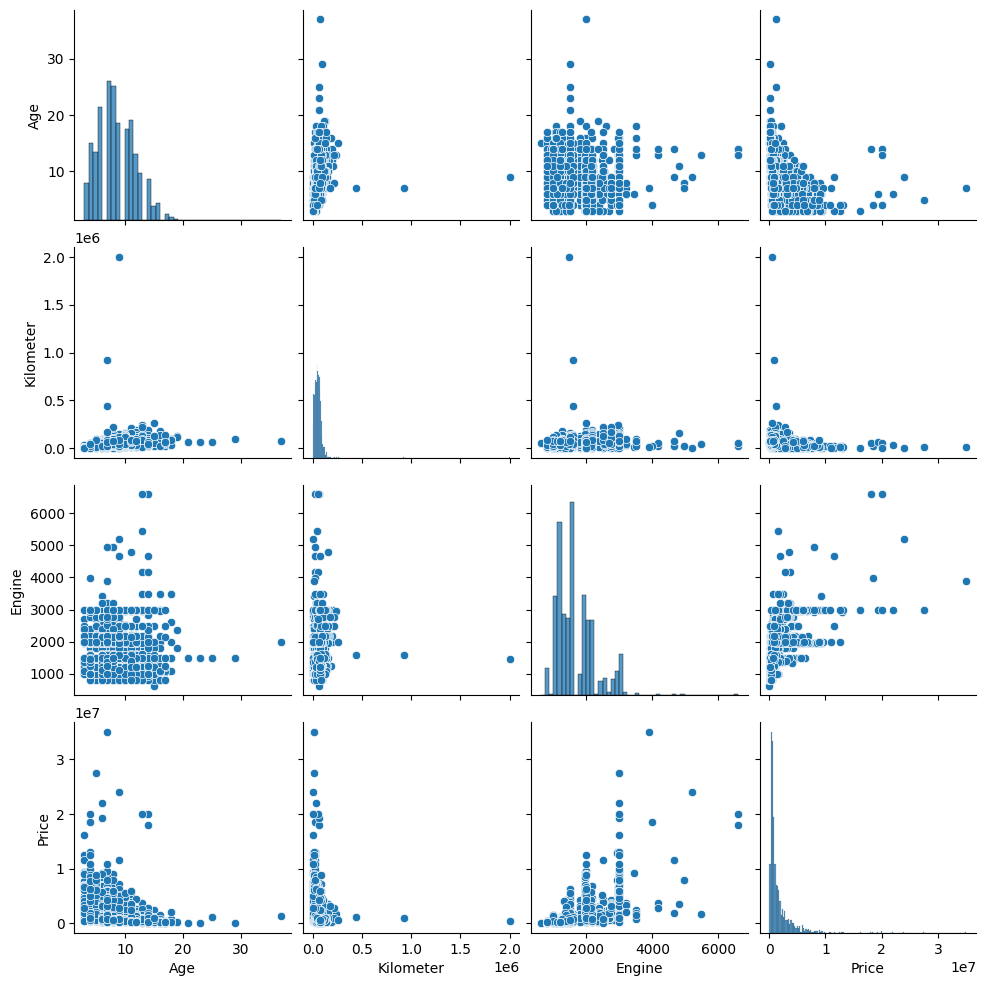

<Figure size 200x200 with 0 Axes>

In [16]:
sns.pairplot(df)
plt.figure(figsize=(2,2))
plt.show()

In [17]:
df.describe()

,Age,Kilometer,Engine,Price
count,2031.000000,2.031000e+03,2031.000000,2.031000e+03
mean,8.617430,5.462158e+04,1681.993164,1.663707e+06
std,3.348681,5.755989e+04,632.482910,2.362224e+06
min,3.000000,7.500000e+01,624.000000,4.900000e+04
25%,6.000000,2.999950e+04,1198.000000,4.824995e+05
50%,8.000000,5.000000e+04,1498.000000,8.250000e+05
75%,11.000000,7.200000e+04,1995.000000,1.875000e+06
max,37.000000,2.000000e+06,6592.000000,3.500000e+07


In [18]:
# removing outliers
df = df[df['Kilometer']<440000.000000]
df = df[df['Price']<1.620000e+07]

## Making Pipeline

In [19]:
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['Make','Model','Fuel Type','Transmission']),
    ('oe', OrdinalEncoder(categories=[['first','second','third','fourth','more']]), ['Owner'])
], remainder='passthrough')

In [20]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('sc', StandardScaler()),
    ('model', RandomForestRegressor(random_state=13))
])

In [21]:
# separating dependent and independent variable
x = df.drop('Price',axis=1)
y = df['Price']

In [22]:
# spliting data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
# model training
pipe.fit(xtrain,ytrain)

C:\Users\acre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Model', 'Fuel Type',
                                                   'Transmission']),
                                                 ('oe',
                                                  OrdinalEncoder(categories=[['first',
                                                                              'second',
                                                                              'third',
                                                                              'fourth',
                                                                              'more']]),
                                                  ['Owner'])])),
                ('sc', StandardScaler()),
                ('model', RandomForestRegressor(random_state=13))])

## Model Evaluation

In [24]:
# accuracy of a model
pipe.score(xtest,ytest)

0.928476753539049

In [25]:
# mean absolute error
ypre = pipe.predict(xtest)
mean_absolute_error(ytest,ypre)

235534.4592986799

## Saving Models

In [26]:
# import joblib

In [27]:
# joblib.dump(pipe,'pipe.pkl')